In [1]:
# Impor library yang diperlukan
import tensorflow as tf  # Library utama untuk deep learning dan pengelolaan tensor
from tensorflow import keras  # API tingkat tinggi untuk membangun model
from tensorflow.keras import layers  # Modul untuk mendefinisikan lapisan seperti Dense dan Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Alat untuk data augmentation
import numpy as np  # Library untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt  # Library untuk visualisasi data seperti grafik dan gambar

In [2]:
# Memuat dataset MNSIT
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()
# Memuat dataset MNSIT: 60.000 data latih penuh dan 10.000 data uji

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Membagi data menjadi training dan validation
from sklearn.model_selection import train_test_split  # Fungsi untuk membagi dataset
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
# Membagi 60.000 data menjadi 48.000 training dan 12.000 validation

In [4]:
# Menormalkan data
x_train = x_train / 255.0  # Normalisasi nilai piksel menjadi 0-1 untuk training
x_val = x_val / 255.0  # Normalisasi data validation
x_test = x_test / 255.0  # Normalisasi data uji
x_train = x_train[..., np.newaxis]  # Menambah dimensi kanal menjadi (48000, 28, 28, 1)
x_val = x_val[..., np.newaxis]  # Menambah dimensi kanal menjadi (12000, 28, 28, 1)
x_test = x_test[..., np.newaxis]  # Menambah dimensi kanal menjadi (10000, 28, 28, 1)

In [5]:
# Data augmentation untuk mengatasi data terbatas
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotasi gambar hingga 10 derajat
    width_shift_range=0.1,  # Geser horizontal hingga 10% lebar
    height_shift_range=0.1,  # Geser vertikal hingga 10% tinggi
    zoom_range=0.1  # Zoom in/out hingga 10%
)
datagen.fit(x_train)  # Menyesuaikan augmentasi dengan data training

In [6]:
# Membuat model CNN sederhana dengan dropout
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Lapisan konvolusi pertama
    layers.MaxPooling2D((2, 2)),  # Lapisan pooling untuk mengurangi dimensi
    layers.Conv2D(64, (3, 3), activation='relu'),  # Lapisan konvolusi kedua
    layers.MaxPooling2D((2, 2)),  # Lapisan pooling kedua
    layers.Flatten(),  # Meratakan output menjadi vektor
    layers.Dropout(0.5),  # Dropout 50% neuron untuk mencegah overfitting
    layers.Dense(128, activation='relu'),  # Lapisan fully connected
    layers.Dense(10, activation='softmax')  # Lapisan output untuk 10 kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Optimizer, loss, dan metrik untuk pelatihan

In [8]:
# Callback untuk early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Memantau loss pada validation
    patience=2,  # Berhenti setelah 2 epoch tanpa perbaikan
    restore_best_weights=True  # Mengembalikan bobot terbaik
)

In [9]:
# Melatih model dengan data augmentation dan early stopping
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,  # Maksimum 20 epoch
                    validation_data=(x_val, y_val),  # Data validation untuk monitoring
                    callbacks=[early_stopping])  # Menggunakan early stopping

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7824 - loss: 0.6646 - val_accuracy: 0.9778 - val_loss: 0.0727
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9494 - loss: 0.1608 - val_accuracy: 0.9861 - val_loss: 0.0422
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9651 - loss: 0.1133 - val_accuracy: 0.9856 - val_loss: 0.0449
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9693 - loss: 0.0963 - val_accuracy: 0.9904 - val_loss: 0.0338
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9727 - loss: 0.0907 - val_accuracy: 0.9907 - val_loss: 0.0315
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9740 - loss: 0.0798 - val_accuracy: 0.9918 - val_loss: 0.0286
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9785 - loss: 0.0703 - val_accuracy: 0.9912 - val_loss: 0.0281
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9787 - loss: 0.06

In [10]:
# Mengevaluasi model pada data uji
test_loss, test_acc = model.evaluate(x_test, y_test)
# Mengukur performa pada data uji
print(f'Akurasi uji: {test_acc:.4f}')  # Menampilkan akurasi uji

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9925 - loss: 0.0213
Akurasi uji: 0.9937


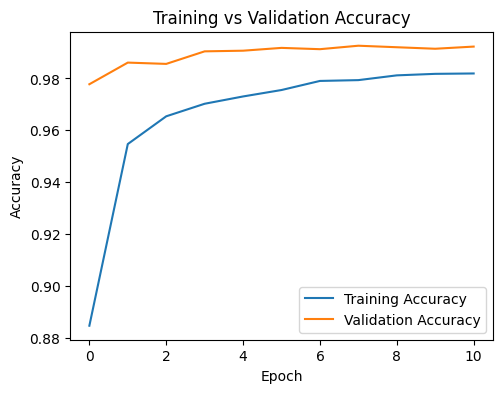

In [11]:
# Visualisasi akurasi training dan validation
plt.figure(figsize=(12, 4))  # Membuat figure dengan ukuran 12x4 inci
plt.subplot(1, 2, 1)  # Subplot pertama untuk akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot akurasi training
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot akurasi validation
plt.title('Training vs Validation Accuracy')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Accuracy')  # Label sumbu y
plt.legend()  # Menampilkan legenda


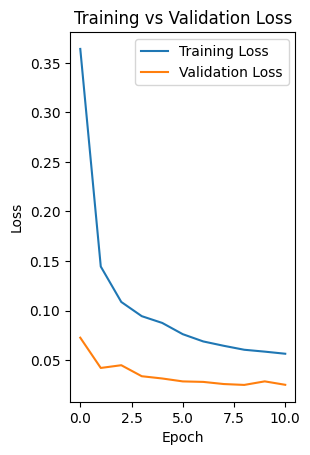

In [12]:
# Visualisasi loss training dan validation
plt.subplot(1, 2, 2)  # Subplot kedua untuk loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot loss training
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot loss validation
plt.title('Training vs Validation Loss')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Loss')  # Label sumbu y
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan kedua plot

In [13]:
# Fungsi untuk visualisasi prediksi
def plot_predictions(images, true_labels, predictions):
    plt.figure(figsize=(10, 10))  # Membuat figure dengan ukuran 10x10 inci
    for i in range(9):  # Loop untuk 9 gambar pertama
        plt.subplot(3, 3, i+1)  # Subplot dalam grid 3x3
        plt.imshow(images[i].squeeze(), cmap='gray')  # Menampilkan gambar dalam grayscale
        pred_label = np.argmax(predictions[i])  # Mengambil label prediksi
        plt.title(f'Pred: {pred_label} | True: {true_labels[i]}')  # Menampilkan prediksi dan label asli
        plt.axis('off')  # Menghilangkan sumbu
    plt.show()  # Menampilkan semua subplot

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


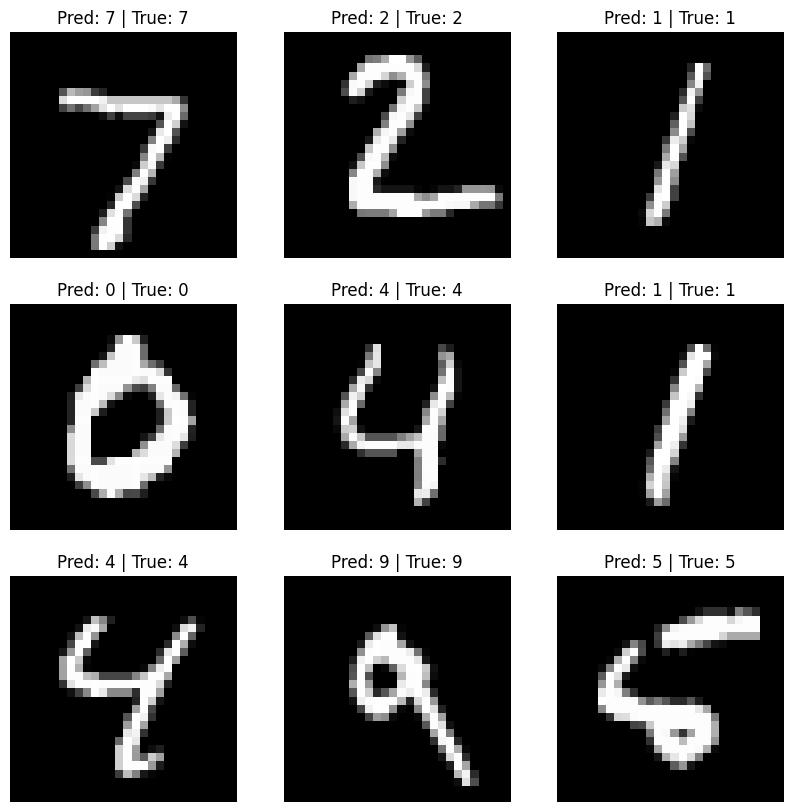

In [14]:
# Membuat prediksi dan visualisasi
predictions = model.predict(x_test[:9])  # Prediksi untuk 9 gambar pertama
plot_predictions(x_test[:9], y_test[:9], predictions)  # Visualisasi prediksi